In [29]:
from scratch.linear_algebra import Vector
from typing import NamedTuple, Union, List
 
class Leaf(NamedTuple):
    value: Vector
leaf1 = Leaf([10, 20])
leaf2 = Leaf([30, -15])

class Merged(NamedTuple):
    children: tuple
    order: int
    
merged = Merged((leaf1, leaf2), order=1)
Cluster = Union[Leaf, Merged]

def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
            for child in cluster.children
            for value in get_values(child)]
print( get_values(merged) == [[10, 20], [30, -15]] )

True


In [30]:
from typing import Callable
from scratch.linear_algebra import distance
def cluster_distance(cluster1: Cluster,
    cluster2: Cluster,
    distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    
    return distance_agg([distance(v1, v2)
        for v1 in get_values(cluster1)
        for v2 in get_values(cluster2)])
    
def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf') # was never merged
    else:
        return cluster.order


In [31]:
from typing import Tuple,Callable
def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children
def bottom_up_cluster(inputs: List[Vector],
                        distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]
    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)
    # as long as we have more than one cluster left...
    while len(clusters) > 1:
    # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                    for i, cluster1 in enumerate(clusters)
                    for cluster2 in clusters[:i]),
                    key=pair_distance)
        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]
        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))
        # and add their merge
        clusters.append(merged_cluster)
    # when there's only one cluster left, return it
    return clusters[0]

def generate_clusters(base_cluster: Cluster,
                        num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]
    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))
    # once we have enough clusters...
    return clusters

In [32]:
inputs = (  [26, 13],[11, 15],[13, 13],[-49, 0],[19, 28],[21, 27],[20, 23],
            [-46, 5],[-41, 8],[-49, 15],[-34, 1],
            [-22, -16],[-19, -11],[-25, -9],[-11, -6],
            [-12, -8],[-14, 5],[-18, -3],[-13, -19],[-9, -16] )
    
base_cluster = bottom_up_cluster(inputs,min)
three_clusters = [get_values(cluster)
    for cluster in generate_clusters(base_cluster, 3)]
print( three_clusters[0])
print( three_clusters[1])
print( three_clusters[2])
print(  )
base_cluster = bottom_up_cluster(inputs,max)
three_clusters = [get_values(cluster)
    for cluster in generate_clusters(base_cluster, 3)]
print( three_clusters[0])
print( three_clusters[1])
print( three_clusters[2])

[[21, 27], [19, 28], [20, 23], [26, 13], [13, 13], [11, 15]]
[[-46, 5], [-49, 0], [-41, 8], [-34, 1], [-49, 15]]
[[-12, -8], [-11, -6], [-18, -3], [-19, -11], [-22, -16], [-25, -9], [-9, -16], [-13, -19], [-14, 5]]

[[13, 13], [11, 15], [26, 13], [21, 27], [19, 28], [20, 23]]
[[-19, -11], [-22, -16], [-25, -9], [-9, -16], [-13, -19], [-12, -8], [-11, -6], [-18, -3], [-14, 5]]
[[-46, 5], [-49, 0], [-49, 15], [-34, 1], [-41, 8]]


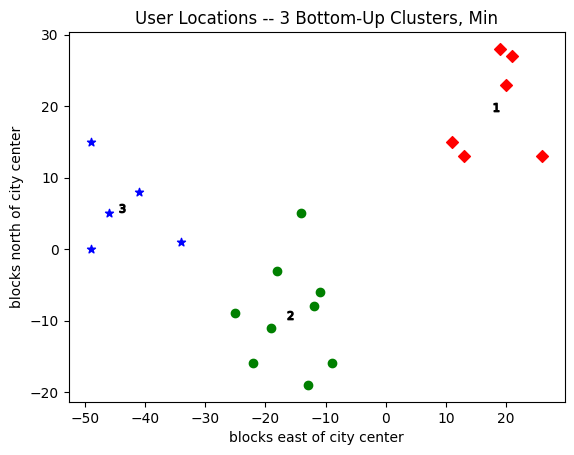

In [23]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"
    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

import matplotlib.pyplot as plt
for i, cluster, marker, color in zip([1, 2, 3],
                                        three_clusters,
                                        ['D','o','*'],
                                        ['r','g','b']):
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')
plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

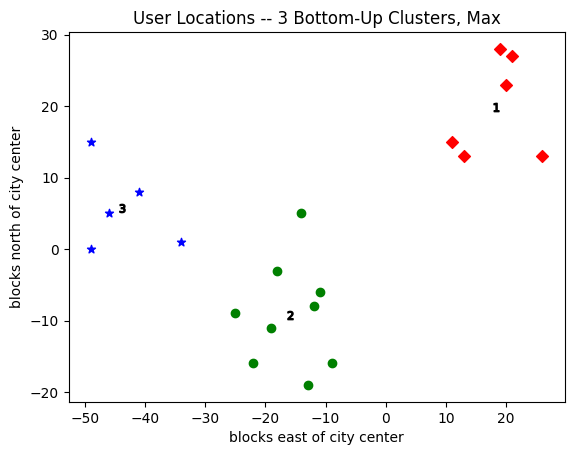

In [24]:
base_cluster = bottom_up_cluster(inputs, max )
three_clusters = [get_values(cluster)
    for cluster in generate_clusters(base_cluster, 3)]

import matplotlib.pyplot as plt
for i, cluster, marker, color in zip([1, 2, 3],
                                        three_clusters,
                                        ['D','o','*'],
                                        ['r','g','b']):
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')
plt.title("User Locations -- 3 Bottom-Up Clusters, Max")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()